In [1]:
!pip install pandas numpy folium geopy


In [2]:
import pandas as pd
import numpy as np
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut


In [4]:
data1 = pd.read_csv(r'C:\Users\priya\Downloads\zomato_data.csv')
data2 = pd.read_csv(r'C:\Users\priya\Downloads\Geographical Coordinates.csv')



In [5]:
# Step 1: Clean the rate column
data1['rate'] = data1['rate'].replace('-', np.nan)  # Replace '-' with NaN
data1['rate'] = data1['rate'].str.replace('/5', '')  # Remove '/5' text
data1['rate'] = pd.to_numeric(data1['rate'], errors='coerce')  # Convert to numeric
data1['rate'].fillna(data1['rate'].median(), inplace=True)  # Fill NaN with median rating


In [6]:
# Step 2: Clean the approx_costfor_two_people column
data1['approx_costfor_two_people'] = data1['approx_costfor_two_people'].replace({',': ''}, regex=True)  # Remove commas
data1['approx_costfor_two_people'] = pd.to_numeric(data1['approx_costfor_two_people'], errors='coerce')  # Convert to numeric
data1['approx_costfor_two_people'].fillna(data1['approx_costfor_two_people'].median(), inplace=True)  # Fill NaN with median cost


In [7]:
# Step 3: Clean categorical columns
data1['dish_liked'] = data1['dish_liked'].fillna('Not Available')
data1['cuisines'] = data1['cuisines'].fillna('Other')
data1['rest_type'] = data1['rest_type'].fillna('Unknown')


In [8]:
# Step 4: Clean the votes column
data1['votes'] = data1['votes'].fillna(data1['votes'].median())


In [9]:
# Step 5: Binary encoding for online_order and book_table
data1['online_order'] = data1['online_order'].apply(lambda x: 1 if x == 'Yes' else 0)
data1['book_table'] = data1['book_table'].apply(lambda x: 1 if x == 'Yes' else 0)


In [10]:
# Step 6: Data type conversion
data1['rate'] = data1['rate'].astype(float)
data1['votes'] = data1['votes'].astype(int)
data1['approx_costfor_two_people'] = data1['approx_costfor_two_people'].astype(int)


In [11]:
# Merge data1 and data2 on 'listed_incity'
merged_df = pd.merge(data1, data2, on='listed_incity', how='left')


In [12]:
# Filter the merged data for Italian restaurants
italian_restaurants = merged_df[merged_df['cuisines'].str.contains('Italian', na=False)]

# Create a Folium map centered around Bangalore
bangalore_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

# Add markers for each Italian restaurant
for index, restaurant in italian_restaurants.iterrows():
    folium.Marker(
        location=[restaurant['Latitude'], restaurant['Longitude']],
        popup=restaurant['name'] + "<br>Rating: " + str(restaurant['rate']),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(bangalore_map)

# Save the map to an HTML file
bangalore_map.save('italian_restaurants_map.html')


KeyError: 'name'

In [13]:
print(merged_df.columns)


Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype',
       'listed_incity', 'Latitude', 'Longitude'],
      dtype='object')


In [ ]:
import folium

# Create a base map centered around Bangalore
bangalore_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

# Add markers to the map
for i, restaurant in merged_df.iterrows():
    try:
        folium.Marker(
            location=[restaurant['Latitude'], restaurant['Longitude']],
            popup=f"Rating: {restaurant['rate']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(bangalore_map)
    except:
        continue

# Display the map
bangalore_map


In [17]:
# Filter for Italian cuisine restaurants
italian_restaurants = merged_df[merged_df['cuisines'].str.contains('Italian', case=False, na=False)]


In [18]:
# Create a map centered around Bangalore
italian_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

# Add Italian restaurant markers
for i, restaurant in italian_restaurants.iterrows():
    try:
        folium.Marker(
            location=[restaurant['Latitude'], restaurant['Longitude']],
            popup=f"Italian Restaurant<br>Rating: {restaurant['rate']}",
            icon=folium.Icon(color='green', icon='cutlery')
        ).add_to(italian_map)
    except:
        continue

# Display the Italian cuisine map
italian_map


In [19]:
bangalore_map.save("bangalore_restaurant_density.html")


In [20]:
italian_map.save("bangalore_italian_restaurants.html")


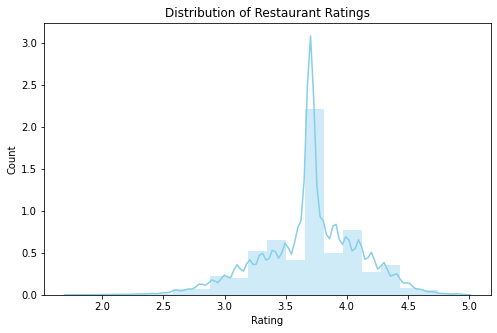

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of ratings
plt.figure(figsize=(8, 5))
sns.distplot(merged_df['rate'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [ ]:
bangalore_map.save("bangalore_restaurant_density.html")

In [ ]:
italian_map.save("bangalore_italian_restaurants.html")